0      2020/02/29 00:00:00+00
1      2020/03/03 00:00:00+00
2      2020/03/04 00:00:00+00
3      2020/03/05 00:00:00+00
4      2020/03/06 00:00:00+00
                ...          
634    2021/11/26 00:00:00+00
635    2021/11/27 00:00:00+00
636    2021/11/28 00:00:00+00
637    2021/11/29 00:00:00+00
638    2021/11/30 00:00:00+00
Name: Date, Length: 639, dtype: object
Start:  2020-09-18 00:00:00
End:  2021-11-30 00:00:00
Tfull:  [1600387200000000000 1600473600000000000 1600560000000000000
 1600646400000000000 1600732800000000000 1600819200000000000
 1600905600000000000 1600992000000000000 1601078400000000000
 1601164800000000000 1601251200000000000 1601337600000000000
 1601424000000000000 1601510400000000000 1601596800000000000
 1601683200000000000 1601769600000000000 1601856000000000000
 1601942400000000000 1602028800000000000 1602115200000000000
 1602201600000000000 1602288000000000000 1602374400000000000
 1602460800000000000 1602547200000000000 1602633600000000000
 1602720000000000000

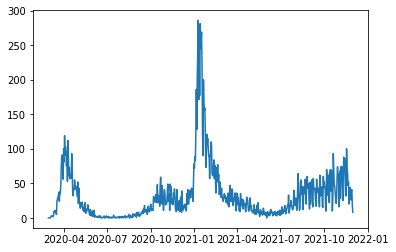

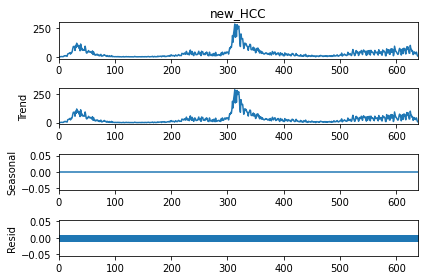

0       0.0
1       0.0
2       0.0
3       1.0
4       3.0
       ... 
634    26.0
635    39.0
636    41.0
637    19.0
638     8.0
Name: trend, Length: 639, dtype: float64
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
634    0.0
635    0.0
636    0.0
637    0.0
638    0.0
Name: seasonal, Length: 639, dtype: float64
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
634    0.0
635    0.0
636    0.0
637    0.0
638    0.0
Name: resid, Length: 639, dtype: float64
0       0.0
1       0.0
2       0.0
3       1.0
4       3.0
       ... 
634    26.0
635    39.0
636    41.0
637    19.0
638     8.0
Name: new_HCC, Length: 639, dtype: float64


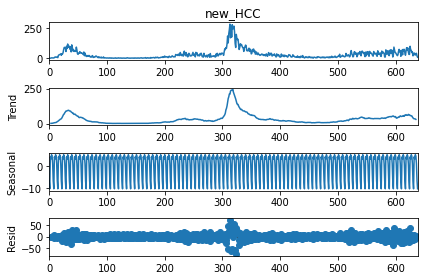

0            NaN
1            NaN
2            NaN
3       1.285714
4       1.571429
         ...    
634    32.714286
635    29.857143
636          NaN
637          NaN
638          NaN
Name: trend, Length: 639, dtype: float64
0      -6.668680
1     -10.194077
2       3.904336
3       2.929035
4       4.855252
         ...    
634     4.855252
635     4.260275
636     0.913860
637    -6.668680
638   -10.194077
Name: seasonal, Length: 639, dtype: float64
0            NaN
1            NaN
2            NaN
3      -3.214749
4      -3.426680
         ...    
634   -11.569537
635     4.882582
636          NaN
637          NaN
638          NaN
Name: resid, Length: 639, dtype: float64
0       0.0
1       0.0
2       0.0
3       1.0
4       3.0
       ... 
634    26.0
635    39.0
636    41.0
637    19.0
638     8.0
Name: new_HCC, Length: 639, dtype: float64


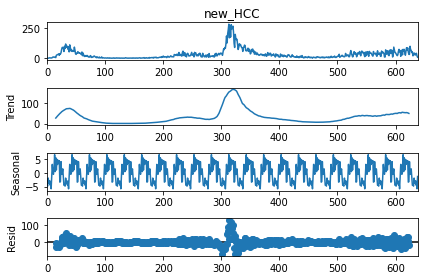

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
634   NaN
635   NaN
636   NaN
637   NaN
638   NaN
Name: trend, Length: 639, dtype: float64
0     -4.376669
1     -4.800003
2     -1.864169
3     -3.787503
4     -2.859169
         ...   
634   -2.859169
635   -4.381669
636   -3.059169
637   -5.772503
638   -1.281669
Name: seasonal, Length: 639, dtype: float64
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
634   NaN
635   NaN
636   NaN
637   NaN
638   NaN
Name: resid, Length: 639, dtype: float64
0       0.0
1       0.0
2       0.0
3       1.0
4       3.0
       ... 
634    26.0
635    39.0
636    41.0
637    19.0
638     8.0
Name: new_HCC, Length: 639, dtype: float64
1000000000.0


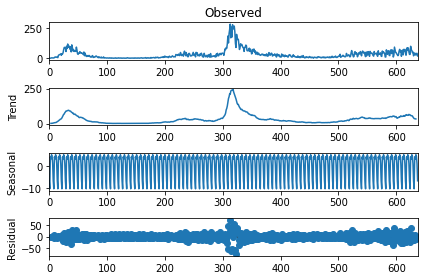

638


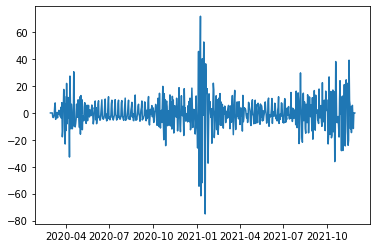

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

df2 = pd.read_csv('c19.csv')
print(df2['Date'])
df2['Date'] = pd.to_datetime(df2['Date']).dt.date
df2['HCC'] = df2['HospitalisedCovidCases'].fillna(0)
prev_num = 0
df2['new_HCC'] = df2['HCC']
for index,row in df2.iterrows():
    df2.at[index, 'new_HCC'] = row['HCC'] - prev_num
    prev_num = row['HCC']
plt.plot(df2['Date'], df2['new_HCC'])



start=pd.to_datetime(df2['Date'][200])
print("Start: ", start)
end=pd.to_datetime(df2['Date'][638])
print("End: ", end)
t_full=pd.array(pd.DatetimeIndex(df2.iloc[200:638,2])).astype(np.int64)
print("Tfull: ", t_full)
dt = t_full[2] - t_full[1] 
print("Data sampling interval", dt)

start=pd.to_datetime(df2['Date'][0])
print("Start: ", start)
end=pd.to_datetime(df2['Date'][638])
print("End: ", end)
t_full1=pd.array(pd.DatetimeIndex(df2.iloc[:638,2])).astype(np.int64)
print("Tfull: ", t_full)
dt = t_full[2] - t_full[1] 
print("Data sampling interval", dt)




t = (t_full[33]-t_full[32])/60/60/24
print(t)
ss = pd.array(pd.Index(df2.iloc[:638,42])).astype(np.int64)
from matplotlib import pyplot
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ss, model='additive', period=7)
result.plot()
pyplot.show()
trend = result.trend
seasonal = result.seasonal
ss = result.resid
for i in range(ss.size):
    if np.isnan(ss[i]):
        ss[i] = 0
# for i in range(trend.size):
#     if np.isnan(trend[i]):
#         trend[i] = 0
# for i in range(seasonal.size):
#     if np.isnan(seasonal[i]):
#         seasonal[i] = 0
# # print(ss)
# sm.graphics.tsa.plot_acf(ss)
# ss = difference(ss, 1)
og_ss = ss
print(og_ss.size)
plt.plot(df2.iloc[:638, 2], ss)
plt.show()





In [ ]:
from pandas import Series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

In [ ]:
stride = 1
lag = 2 #determines the feature vector size
dd = 1 #number of samples in a day 
q = 1
XX = og_ss[0:og_ss.size - q - lag * dd:stride]
for i in range(1,lag): 
    X = og_ss[i*dd:og_ss.size - q - (lag-i)*dd:stride]
    print(X)
    XX = np.column_stack((XX,X))
  # print(XX.size) #will be size = lag * X_size
yy = og_ss[lag*dd+q::stride] #size of XX before column stacking
# print("SS:",ss.size)
# print("yy:",yy.size)
tt = t_full1[lag*dd+q::stride]
  # print(tt.size)
from sklearn.model_selection import train_test_split 
train, test = train_test_split(np.arange(0,yy.size),test_size=0.2)

from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
model = Lasso(fit_intercept=False, alpha=0).fit(XX[train], yy[train]) 
  # print(model.intercept_, model.coef_)

y_pred = model.predict(XX) 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(yy, y_pred)
rmse = math.sqrt(mse)
print("mse:", rmse)
y_pred = y_pred + seasonal[3:] + trend[3:]
og_ss = og_ss + seasonal + trend
yy = yy + seasonal[3:] + trend[3:]
plt.rcParams["figure.figsize"] = (25,10)
plt.plot(t_full1, og_ss, color='black')
plt.plot(tt, y_pred, color='blue')
plt.show()




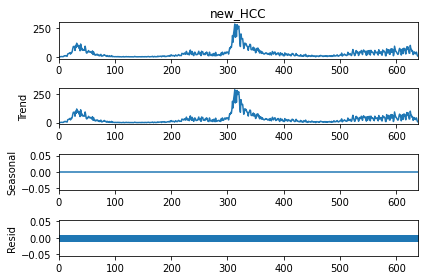

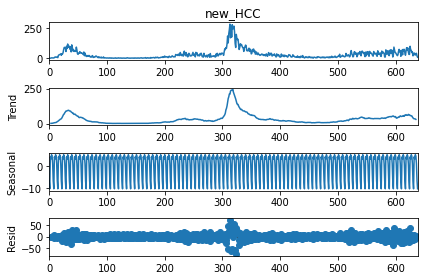

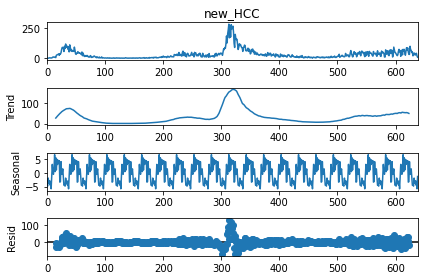

In [4]:

from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df2.iloc[:,42], model='additive', period=1)
result.plot()
pyplot.show()



from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df2.iloc[:,42], model='additive', period=7)
result.plot()
pyplot.show()



from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df2.iloc[:,42], model='additive', period=30)
result.plot()
pyplot.show()
